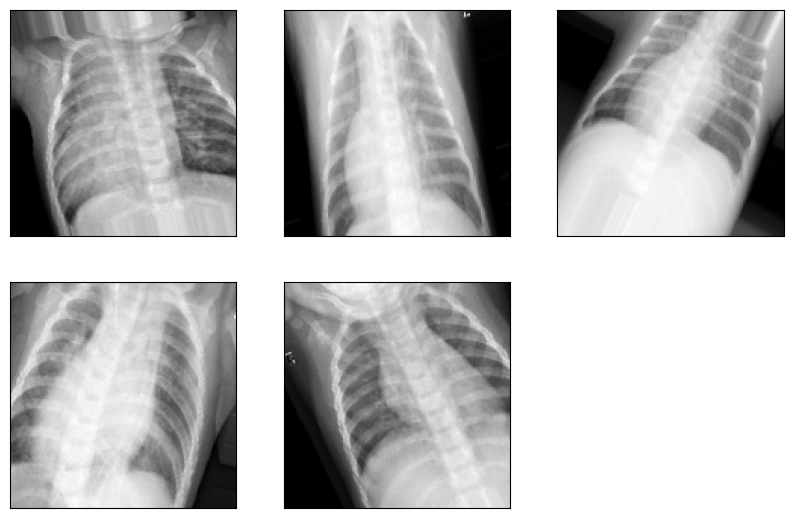

C:\Users\vikne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


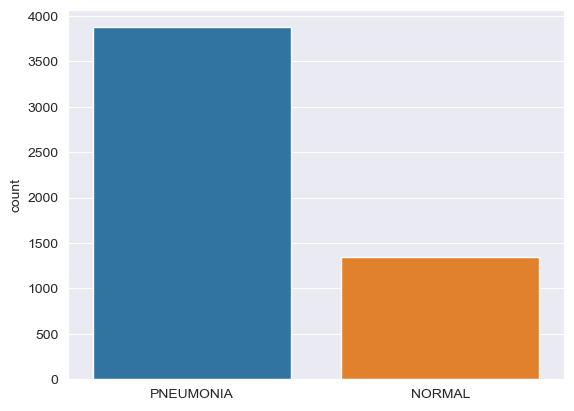

Data augmentation complete and ready for model training.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

# Function to get data from directory
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is not None:
                    resized_arr = cv2.resize(img_arr, (img_size, img_size))
                    data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

# Load data
train = get_data('../../chest_xray/train')
test = get_data('../../chest_xray/test')
val = get_data('../../chest_xray/val')

# Separate features and labels
def separate_features_labels(data):
    features, labels = [], []
    for feature, label in data:
        features.append(feature)
        labels.append(label)
    return np.array(features), np.array(labels)

x_train, y_train = separate_features_labels(train)
x_val, y_val = separate_features_labels(val)
x_test, y_test = separate_features_labels(test)

# Normalize the data
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Reshape data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
x_val = x_val.reshape(-1, img_size, img_size, 1)
x_test = x_test.reshape(-1, img_size, img_size, 1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

datagen.fit(x_train)

# Display some augmented images
def display_augmented_images(datagen, x_train, y_train):
    plt.figure(figsize=(10,10))
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=5):
        for i in range(0, 5):
            plt.subplot(330 + 1 + i)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(x_batch[i].reshape(img_size, img_size), cmap='gray')
        break
    plt.show()

display_augmented_images(datagen, x_train, y_train)

# Show class distribution
def show_class_distribution(labels, label_names):
    sns.set_style(style='darkgrid')
    sns.countplot(x=[label_names[label] for label in labels])
    plt.show()

show_class_distribution(y_train, labels)

# Save the augmented data for further steps if needed
def save_augmented_data(datagen, x_data, y_data, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    for i, (x_batch, y_batch) in enumerate(datagen.flow(x_data, y_data, batch_size=32, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg')):
        if i > 100:  # limit to save 100 batches
            break

# Example usage
# save_augmented_data(datagen, x_train, y_train, './augmented_data')

print("Data augmentation complete and ready for model training.")